<img src="https://s3.amazonaws.com/ByC_logo_prod/unit-26963.jpg" alt="Alt text that describes the graphic" width="600" />

# Title :  Credit Card Fraud Detection using Machine Learning.

# Table of contents

- [Abstract](#Abstract)
- [Introduction](#Introduction)
- [1. The problem](#1.-The-problem)
- [2. Purpose of the study](#2.-Purpose-of-the-study)
- [3. Project description](#3.-Project-description)
    - [3.1 Hypothesis](#3.1.-Hypothesis)
    - [3.2 System Mapping](#3.2.-System-Mapping)
    - [3.3 Workflow](#3.3.-Workflow)
    - [3.4 Methods](#3.4.-Methods)
    - [3.5 Analysis and Results](#3.5.-Analysis-and-Results)
- [Conclusion](#Conclusion)
- [References](#References)

##  Abstract
 This project illustrates the modelling of a dataset using machine learning with credit card fraud detection. The credit card fraud detection problem includes modelling past credit card transactions with the data of the ones that turned out to be fraud. The data set used in the project is a public open-source dataset downloaded from Kaggle which contains past credit card transactions of 917 customers through 693 merchants. The data set which is large contains 555,719 transactions of which 2145 are fraud and the rest are normal. The credit card fraud detection is a typical classification problem which involved the use of machine learning classification algorithms to create models which will were fitted with the training dataset. Exploratory data analysis conducted on the dataset reveals that it is highly unbalanced due to 0.4% of the transactions being fraudulent. The data is sampled and a fraction (0.1) of the data is split into 90% training and  10% testing set. The training set is balanced through over sampling with the Imblearn library. The balanced training dataset is fitted into the built models of the  Support Vector Machines, Decision Tree, K-Nearest Neighbors and  Random Forest Classification algorithms. The testing data set is used in the prediction of fraud cases and the models were evaluated using the accuracy, precision, recall  and f1 score. The AUC_ROC(Area under the Receiver operator Characteristic curve) was used in the final evaluation of the models. The results revealed that the SVM had the best accuracy of 90.3% but the least fraud percentage detection of 9.7% while the Random Forest had the most fraud percentage detection of 39.62%. Therefore, the best performing model is the Random Forest Classifier algorithm.

## Introduction
Credit card fraud can be defined as a case where a fraudster uses someone else’s credit card for personal reasons while the owner and the card issuing authorities are unaware of the fact that the card is being used. Fraud detection involves the careful study and monitoring of transactions by  population of credit card users  with the aim of estimating, perceiving and preventing fraud, intrusion and theft. 
Fraud detection is essentially a rare event problem, which has been variously called outlier analysis, anomaly detection, exception mining, mining rare classes, mining imbalanced data etc. The number of fraud transactions is usually a very low fraction of the total transactions. Hence the task of detecting fraud transactions in an accurate and efficient manner is fairly difficult and challenging. hence the development of efficient models which will predict and detect fraud transactions is essential.The exploratory data analysis conducted on the credit card data reveals that it contains 555,719 transactions performed conducted by 917 customers through 693 different merchants.The number of fraud transactions are only 0.4% of total transactions which indicates a very high unbalanced dataset. Hence,we are faced with a classification problem which can be solved through machine learning methods.
Machine Learning is divided into supervised and unsupervised learning. Supervised learning is futher divided into classification and regression.Fraud detection will require the use of classification algorithm models. Before the classification algorithms are selected, the highly unbalanced data can be balanced through sampling methods(under and over sampling) and then data is splitted into testing and training data. The training data is fitted into the model classifier and the test data is used to predict the outcome of fraud transaction. The Support vector Machines, Random Tree Forest, K Nearest Neighbour(KNN) and Decison Tree classifier models were built and fitted with the balanced training data.
The best model is selected and evaluated through the metrics accuracy,precision,recall and f1 score. Finally,the ROC_AUC(Receiver operation Characteristic) curve score reveals the model with the best performance. 

## 1. The problem
 The credit card fraud detection data faces three major challenges when being analyzed
 
####  Changing fraud patterns over time 
This one is the toughest problems to address since the fraudsters are always in the lookout to find new and innovative ways to get around the fraud detection systems. Thus it becomes very important for machine learning models to be updated with the evolved patterns to detect fraud. This results in a decrease in the model’s performance and efficiency. Thus the machine learning models need to keep updating or fail in their objectives.
 
#### Large dataset  
The dataset is a very large one containing 555,719 transactions.The magnitude of the data will pose a problem for the classification model that will be fitted with the training data. The data processing speed due to the large dataset wil be very slow and will cost more time in analysis. This problem is solved through sampling a fraction of the data(10% of the data) and using this small fraction for model fitting and selection.

#### Highly unbalanced data 
Because this is a fraud detection problem,the percentage of fraud transaction is 0.4% of the total transactions as revealed by exploratory data analysis. This poses another challenge because the classifcation models are not prepared to deal with unbalanced data. This problem is solved by balancing the small fraction of the already taken from the larger dataset.The unbalanced training dataset is taken through the process of oversampling and used in fitting the models created with the classification algorithms.





[Back to top](#Table-of-contents)

## 2. Purpose of the study
The purpose of the study is to leverage the vast amount of data collected from online transactions and model it in such a way that allows for the prediction of fraud in future transactions.
Every year,companies in the United States loose billions of dollars in sales to fraud transactions. Predicting and preventing fraud transactions will help companies improve financial security and prevent the loss of revenue to fraud.It will also help protect customers and improve their trust in the services offered by the companies.

The objectives of the project are as follows:

1 To tackle the high unbalanced nature of the training data through oversampling mehtods

2 To build,select and evaluate an accurate classification model that will be fitted 
and will be used in predicting fraud transactions in the dataset.

3 To deploy the selected model which can be applied in different business transactions for the purpose of detecting and preventing credit card fraud. 


[Back to top](#Table-of-contents)

## 3. Project description


[Back to top](#Table-of-contents)

### 3.1 Hypothesis
In this project,we want to predict the nature of future credit card transactions using the past transactions. We want to answer these questions:

Is the transaction conducted by the customer normal or fraudulent ?

What is the probability of the occurence of fraud in future transactions using the past credit card transactions?
We will be using the mean number of transaction(normal or fraud) to compare the null and the alternative hypothesis.

The null-hypothesis(Ho) states be that there is no difference between the probability of fraud transaction and the mean number of transactions. The validity of the null hypothesis proves that the probability of normal transaction is far greater than that of fraud transaction.

The alternative hypothesis(H1) states that there is a significant difference between the probability of the fraud transaction and the mean.
The hypothesis test will be conducted to prove or disprove the null hypothesis.

[Back to top](#Table-of-contents)

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

In [12]:
creditcard = pd.read_csv("creditcard.csv")
creditcard.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [13]:
Mean = creditcard.is_fraud.mean()
Mean

0.0038598644278853163

In [15]:
Prob = creditcard.is_fraud==1/creditcard.is_fraud

In [16]:
#Conducting T test
stats.ttest_1samp(Prob, Mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

The P value of 1.0 shows that the mean is equal to the probability of the transactions appearing as fraud.Therefore we accept the null hypothesis Ho

### 3.2 System Mapping
 The probabilities of the normal and fraud transactions can be estimated through the use of the Bayes theorem. The mathematical equation is  defined as follows:
                                                                 $
                                                      P(F)=  P(F).P(x|F)/(P(x) 
                                                                  $
 where the denominator P(x) is calculated as:
                                                                  $
                                                  P(x) = P(F)P(x|F) + P(NF)P(x|NF)
                                                                   $
               
               
$P(F)$ = Probability that a transaction is fraud

$P(NF)$ = Probability that a transaction is normal

$P(x|F)$ = Probability that a transaction is fraud given the observed user behavior  $x$

$P(x|NF)$ = Probability that a transaction is normal given the observed user behavior  $x$

$P(x)$  = Probability of the observed user behavior  $x$


[Back to top](#Table-of-contents)

### 3.3 Workflow

What's the process you are going to follow to solve the problem based on the Problem-Solving Framework:

- Define the problem 
- Map the system 
- Define suitable metrics 
- Select modeling tools 
- Implement model  
- Evaluate model 
- Deploy the final model 

[Back to top](#Table-of-contents)

### 3.4 Methods
The fraud detection problem is a classification problem hence classification models and algorithms are required for model fitting and selection

#### Data Balancing 
The unbalanced training data set was transformed into balanced data through the use of oversampling methods. Oversampling is preferred to undersampling because no data is lost after transformation. The imblearn library will be used for oversampling. The imblearn library is imported as SMOTETomek and RandomOverSampler for oversampling the unbalanaced data.

#### Model Selection
The following classification machine learning alagorithms will be used in building a model for fraud detection

Decision Trees Classifier: DTC is a non-parametric supervised learning method that will be used for classification of fraud detection. The goal is to create a model that predicts the value of  the fraud variable by learning the simple decision rules inferred from the credit card data features

Support Vector Machines : Support Vector machines is a supervised learning method that will be used in building a model for performing binary and multi-class classification of the credit card fraud dataset.

K Nearest Neighbours : 
Neighbors-based classification is a type of instance-based learning or non-generalizing learning.It will not attempt to construct a general internal model, but it will simply store instances of the training data.

Random Forest Classifier: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.


#### Model Evaluation

Classification Scores:
The following classification metrics will be used in the selection and evaluation of the models

Accuracy : The balanced accuracy in binary and multiclass classification problems is used for imbalanced datasets. It is defined as the average of recall obtained on each class.

Precision:The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

Recall:The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

F1 Score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

ROC_AUC : The Receiver Operating Characteristic (ROC) curve is a graph with the x-axis values as the False Positive Rate (FPR) and the y-axis values as the True Positive Rate (TPR). The Area Under the Curve (AUC) for the ROC represents how capable a model is at correctly classifying a sample.



[Back to top](#Table-of-contents)

## 3.5 Analysis and Results

###  Data Cleaning and Exploratory Data Analysis


[Back to top](#Table-of-contents)

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Reading the first five rows of dataset
creditcard = pd.read_csv("creditcard.csv")
creditcard.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [6]:
creditcard.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [7]:
creditcard.shape

(555719, 23)

In [8]:
creditcard.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
#removing unnecessary columns
creditcard.drop(columns=['lat','long','merch_lat','merch_long','zip','street','Unnamed: 0'] , inplace=True)
#renamning some columns
creditcard.rename(columns= {'amt':'amount', 'dob':'D.O.B'}, inplace=True)
# combining the first and last column into name column
creditcard['Name'] = creditcard["first"] +" "+ creditcard["last"]
creditcard.drop(columns= ['first', 'last'], inplace=True)
# splitting trans_date_trans_time column
creditcard[['trans_date','trans_time']] = creditcard.trans_date_trans_time.str.split(expand=True)
creditcard.drop('trans_date_trans_time', axis=1, inplace=True)
# Rearrange columns 
creditcard = creditcard[['Name','gender','D.O.B','job', 'city', 'city_pop',
                           'state','merchant','category', 'amount','trans_date',
                           'trans_time','cc_num','trans_num', 'unix_time','is_fraud']]

In [10]:
creditcard.head()

,Name,gender,D.O.B,job,city,city_pop,state,merchant,category,amount,trans_date,trans_time,cc_num,trans_num,unix_time,is_fraud
0,Jeff Elliott,M,1968-03-19,Mechanical engineer,Columbia,333497,SC,fraud_Kirlin and Sons,personal_care,2.86,2020-06-21,12:14:25,2291163933867244,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,Joanne Williams,F,1990-01-17,"Sales professional, IT",Altonah,302,UT,fraud_Sporer-Keebler,personal_care,29.84,2020-06-21,12:14:33,3573030041201292,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,Ashley Lopez,F,1970-10-21,"Librarian, public",Bellmore,34496,NY,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,2020-06-21,12:14:53,3598215285024754,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,Brian Williams,M,1987-07-25,Set designer,Titusville,54767,FL,fraud_Haley Group,misc_pos,60.05,2020-06-21,12:15:15,3591919803438423,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,Nathan Massey,M,1955-07-06,Furniture designer,Falmouth,1126,MI,fraud_Johnston-Casper,travel,3.19,2020-06-21,12:15:17,3526826139003047,57ff021bd3f328f8738bb535c302a31b,1371816917,0


In [11]:
creditcard.isnull().any()

Name          False
gender        False
D.O.B         False
job           False
city          False
city_pop      False
state         False
merchant      False
category      False
amount        False
trans_date    False
trans_time    False
cc_num        False
trans_num     False
unix_time     False
is_fraud      False
dtype: bool

In [12]:
creditcard.drop_duplicates(subset= creditcard.columns)

,Name,gender,D.O.B,job,city,city_pop,state,merchant,category,amount,trans_date,trans_time,cc_num,trans_num,unix_time,is_fraud
0,Jeff Elliott,M,1968-03-19,Mechanical engineer,Columbia,333497,SC,fraud_Kirlin and Sons,personal_care,2.86,2020-06-21,12:14:25,2291163933867244,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0
1,Joanne Williams,F,1990-01-17,"Sales professional, IT",Altonah,302,UT,fraud_Sporer-Keebler,personal_care,29.84,2020-06-21,12:14:33,3573030041201292,324cc204407e99f51b0d6ca0055005e7,1371816873,0
2,Ashley Lopez,F,1970-10-21,"Librarian, public",Bellmore,34496,NY,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,2020-06-21,12:14:53,3598215285024754,c81755dbbbea9d5c77f094348a7579be,1371816893,0
3,Brian Williams,M,1987-07-25,Set designer,Titusville,54767,FL,fraud_Haley Group,misc_pos,60.05,2020-06-21,12:15:15,3591919803438423,2159175b9efe66dc301f149d3d5abf8c,1371816915,0
4,Nathan Massey,M,1955-07-06,Furniture designer,Falmouth,1126,MI,fraud_Johnston-Casper,travel,3.19,2020-06-21,12:15:17,3526826139003047,57ff021bd3f328f8738bb535c302a31b,1371816917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,Michael Olson,M,1966-02-13,Town planner,Luray,519,MO,fraud_Reilly and Sons,health_fitness,43.77,2020-12-31,23:59:07,30560609640617,9b1f753c79894c9f4b71f04581835ada,1388534347,0
555715,Jose Vasquez,M,1999-12-27,Futures trader,Lake Jackson,28739,TX,fraud_Hoppe-Parisian,kids_pets,111.84,2020-12-31,23:59:09,3556613125071656,2090647dac2c89a1d86c514c427f5b91,1388534349,0
555716,Ann Lawson,F,1981-11-29,Musician,Burbank,3684,WA,fraud_Rau-Robel,kids_pets,86.88,2020-12-31,23:59:15,6011724471098086,6c5b7c8add471975aa0fec023b2e8408,1388534355,0
555717,Eric Preston,M,1965-12-15,Cartographer,Mesa,129,ID,fraud_Breitenberg LLC,travel,7.99,2020-12-31,23:59:24,4079773899158,14392d723bb7737606b2700ac791b7aa,1388534364,0


In [13]:
# Checking the number of transactions done by each customer
creditcard['Name'].value_counts(ascending=True)

Destiny Fowler          6
Joseph Bartlett         7
Stephanie Freeman       8
Rachel Williams         9
Nicole Dominguez        9
                     ... 
Carrie Washington    1462
Michelle Gregory     1466
Gina Grimes          1474
Jeffrey Smith        1526
Scott Martin         1965
Name: Name, Length: 917, dtype: int64

In [14]:
#Number of Merchants
creditcard['merchant'].value_counts(ascending=True)

fraud_Ritchie, Bradtke and Stiedemann     304
fraud_Jerde-Hermann                       312
fraud_Kessler Group                       318
fraud_Satterfield-Lowe                    319
fraud_Treutel-King                        323
                                         ... 
fraud_Dickinson Ltd                      1519
fraud_Kuhn LLC                           1521
fraud_Schumm PLC                         1561
fraud_Cormier LLC                        1597
fraud_Kilback LLC                        1859
Name: merchant, Length: 693, dtype: int64

In [15]:
# Checking the number of transactions that are fraud and normal
creditcard['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

In [16]:
import seaborn as sns

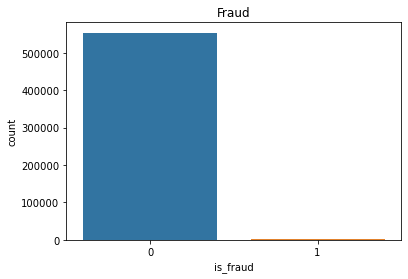

In [17]:
sns.countplot('is_fraud', data=creditcard)
plt.title('Fraud')
plt.show()

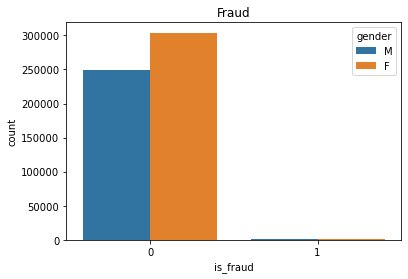

In [18]:
sns.countplot('is_fraud',hue='gender' ,data=creditcard)
plt.title('Fraud')
plt.show()

### Data Preprocessing and Feature Engineering

In [19]:
creditcard.dtypes

Name           object
gender         object
D.O.B          object
job            object
city           object
city_pop        int64
state          object
merchant       object
category       object
amount        float64
trans_date     object
trans_time     object
cc_num          int64
trans_num      object
unix_time       int64
is_fraud        int64
dtype: object

In [20]:
# converting categorical to numerical
obj_creditcard = creditcard.select_dtypes(include=['object']).copy()
obj_creditcard.head()

,Name,gender,D.O.B,job,city,state,merchant,category,trans_date,trans_time,trans_num
0,Jeff Elliott,M,1968-03-19,Mechanical engineer,Columbia,SC,fraud_Kirlin and Sons,personal_care,2020-06-21,12:14:25,2da90c7d74bd46a0caf3777415b3ebd3
1,Joanne Williams,F,1990-01-17,"Sales professional, IT",Altonah,UT,fraud_Sporer-Keebler,personal_care,2020-06-21,12:14:33,324cc204407e99f51b0d6ca0055005e7
2,Ashley Lopez,F,1970-10-21,"Librarian, public",Bellmore,NY,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,2020-06-21,12:14:53,c81755dbbbea9d5c77f094348a7579be
3,Brian Williams,M,1987-07-25,Set designer,Titusville,FL,fraud_Haley Group,misc_pos,2020-06-21,12:15:15,2159175b9efe66dc301f149d3d5abf8c
4,Nathan Massey,M,1955-07-06,Furniture designer,Falmouth,MI,fraud_Johnston-Casper,travel,2020-06-21,12:15:17,57ff021bd3f328f8738bb535c302a31b


In [21]:
creditcard['time'] = creditcard[['unix_time']].diff()
creditcard.head()    

,Name,gender,D.O.B,job,city,city_pop,state,merchant,category,amount,trans_date,trans_time,cc_num,trans_num,unix_time,is_fraud,time
0,Jeff Elliott,M,1968-03-19,Mechanical engineer,Columbia,333497,SC,fraud_Kirlin and Sons,personal_care,2.86,2020-06-21,12:14:25,2291163933867244,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,0,NaN
1,Joanne Williams,F,1990-01-17,"Sales professional, IT",Altonah,302,UT,fraud_Sporer-Keebler,personal_care,29.84,2020-06-21,12:14:33,3573030041201292,324cc204407e99f51b0d6ca0055005e7,1371816873,0,8.0
2,Ashley Lopez,F,1970-10-21,"Librarian, public",Bellmore,34496,NY,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,2020-06-21,12:14:53,3598215285024754,c81755dbbbea9d5c77f094348a7579be,1371816893,0,20.0
3,Brian Williams,M,1987-07-25,Set designer,Titusville,54767,FL,fraud_Haley Group,misc_pos,60.05,2020-06-21,12:15:15,3591919803438423,2159175b9efe66dc301f149d3d5abf8c,1371816915,0,22.0
4,Nathan Massey,M,1955-07-06,Furniture designer,Falmouth,1126,MI,fraud_Johnston-Casper,travel,3.19,2020-06-21,12:15:17,3526826139003047,57ff021bd3f328f8738bb535c302a31b,1371816917,0,2.0


In [22]:
#drop unnecessary columns
creditcard.drop(obj_creditcard, axis=1, inplace=True)

In [23]:
creditcard.head()

,city_pop,amount,cc_num,unix_time,is_fraud,time
0,333497,2.86,2291163933867244,1371816865,0,NaN
1,302,29.84,3573030041201292,1371816873,0,8.0
2,34496,41.28,3598215285024754,1371816893,0,20.0
3,54767,60.05,3591919803438423,1371816915,0,22.0
4,1126,3.19,3526826139003047,1371816917,0,2.0


In [24]:
creditcard = creditcard.fillna(0)

In [25]:
#Get the Fraud and the normal dataset 
fraud = creditcard[creditcard['is_fraud']==1]
normal = creditcard[creditcard['is_fraud']==0]

fraud.shape,normal.shape

((2145, 6), (553574, 6))

In [26]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in fraud and normal data
fraud.amount.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amount, dtype: float64

In [27]:
normal.amount.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amount, dtype: float64

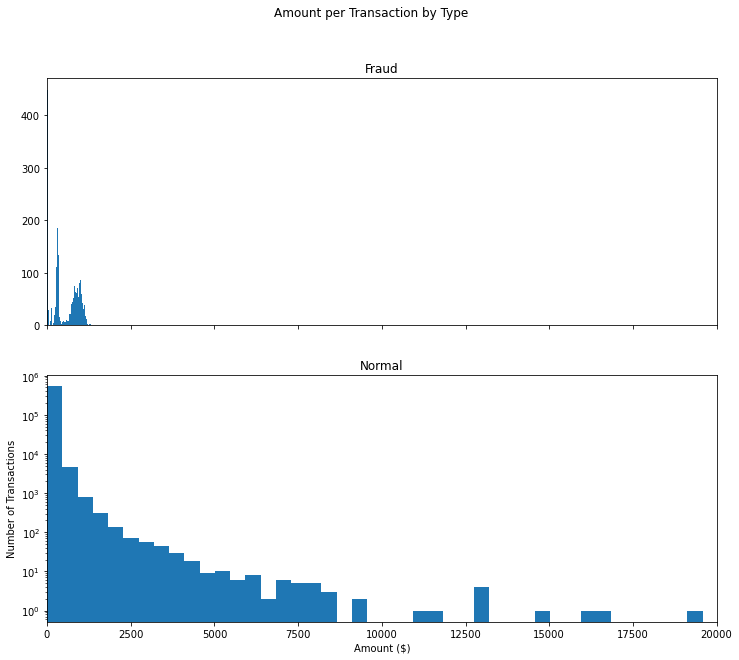

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10), sharex=True)
f.suptitle('Amount per Transaction by Type')
bins = 50
ax1.hist(fraud.amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

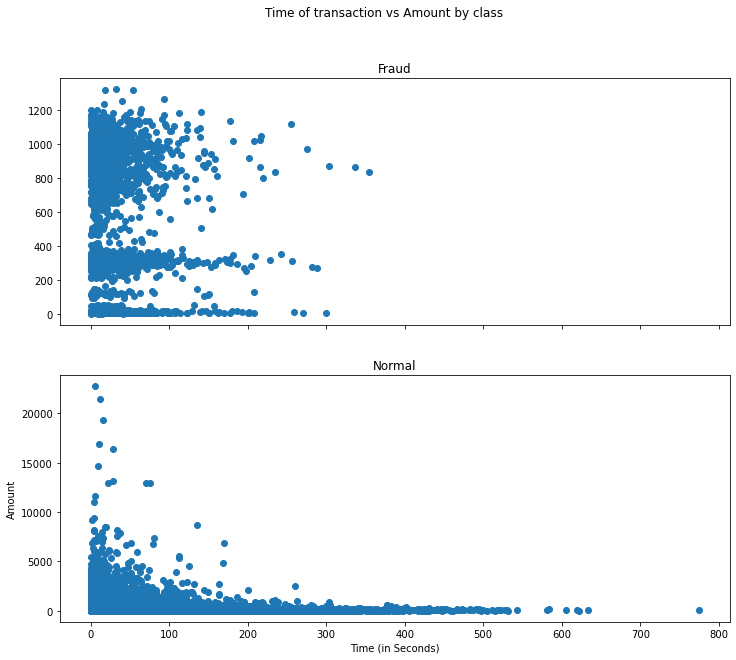

In [29]:
# Checking if fraudulent transactions occur more often during certain time frame
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10) ,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.time, fraud.amount)
ax1.set_title('Fraud')
ax2.scatter(normal.time, normal.amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

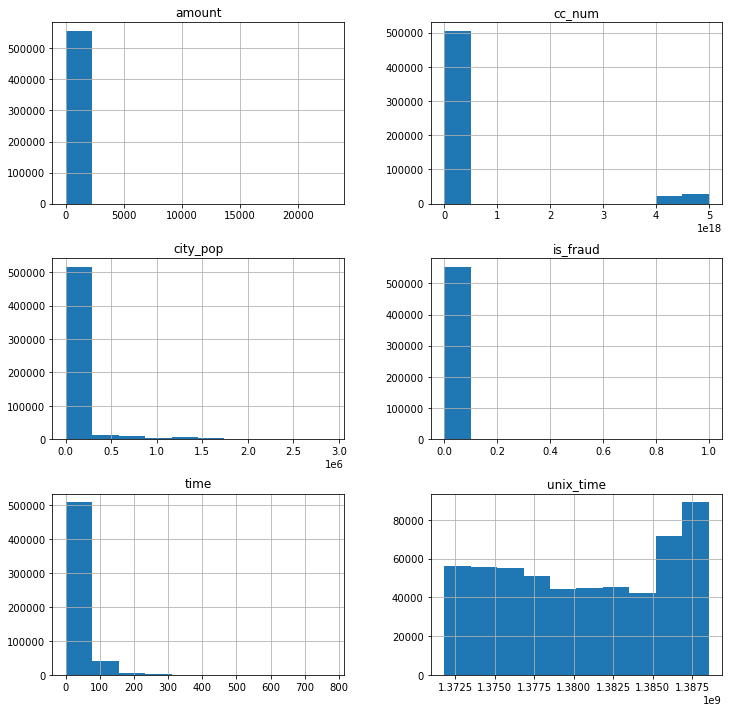

In [30]:
#plot a histogram showing each parameter
creditcard.hist(figsize=(12,12))
plt.show()

In [31]:
#Sample a fraction of the data
creditcard1= creditcard.sample(frac = 0.1,random_state=1)

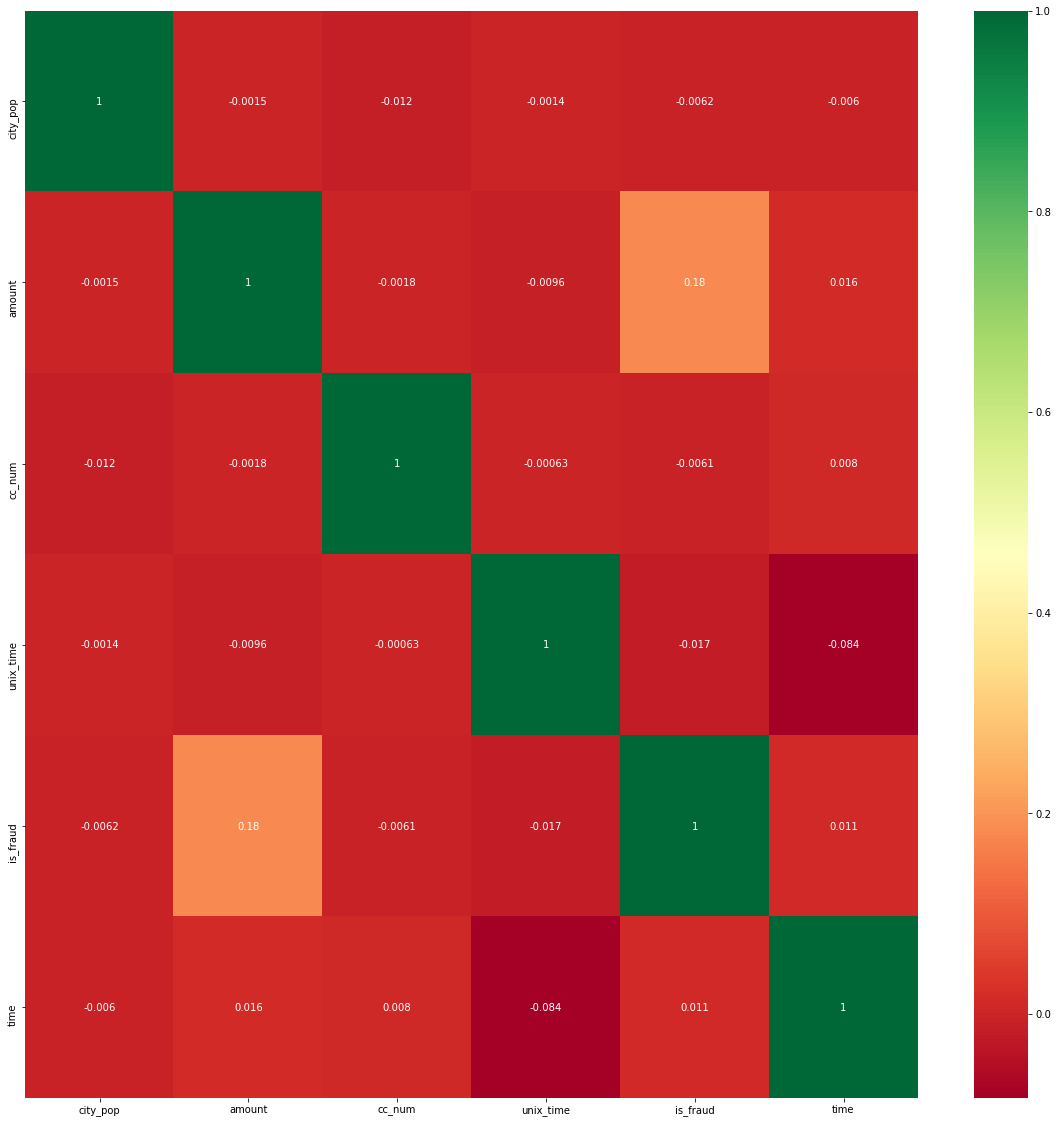

In [32]:
#get correlations of each variable in dataset
corrmat = creditcard1.corr()
corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(creditcard1[corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
# Create independent and dependent variables
columns = creditcard1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["is_fraud"]]
# Store the variable we are predicting 
target = "is_fraud"
# Define a random state 
state = np.random.RandomState(42)
X = creditcard1[columns]
Y = creditcard1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(55572, 5)
(55572,)


In [34]:
#standardization and normalization
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
Y= creditcard1[target]

In [35]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=42)

### Data Balancing

The imbalanced training dataset will be balanced using OverSampling  

In [36]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\nkemu\anaconda3\lib\site-packages (0.8.0)Note: you may need to restart the kernel to use updated packages.



In [37]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [38]:
#Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [39]:
X_res.shape,y_res.shape

((99500, 5), (99500,))

In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 49798, 1: 216})
Resampled dataset shape Counter({0: 49750, 1: 49750})


In [41]:
# Using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [42]:
os =  RandomOverSampler(sampling_strategy=0.6)

In [43]:
X_train_R, y_train_R = os.fit_resample(X_train, y_train)

In [44]:
X_train_R.shape,y_train_R.shape

((79676, 5), (79676,))

In [45]:
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_R)))

Original dataset shape Counter({0: 49798, 1: 216})
Resampled dataset shape Counter({0: 49798, 1: 29878})


### Model Selection

In [46]:
from sklearn import svm # support vector machine
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure 

In [47]:
#Linear-SVM
SVM= svm.SVC(kernel='linear',C=0.1, gamma=0.1)
SVM.fit(X_train_R, y_train_R)
prediction1=SVM.predict(X_test)
print("Accuracy for linear SVM is", metrics.accuracy_score(y_test, prediction1))
print(metrics.classification_report(y_test, prediction1))

Accuracy for linear SVM is 0.9728319539402663
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5534
           1       0.12      0.83      0.21        24

    accuracy                           0.97      5558
   macro avg       0.56      0.90      0.60      5558
weighted avg       1.00      0.97      0.98      5558



In [48]:
# Decision Trees
DTC= DecisionTreeClassifier()
DTC.fit(X_train_R,y_train_R)
prediction2=DTC.predict(X_test)
print('Accuracy of the Decision Tree Classifier is', metrics.accuracy_score(y_test, prediction2))
print(metrics.classification_report(y_test, prediction2))

Accuracy of the Decision Tree Classifier is 0.9942425332853544
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5534
           1       0.28      0.21      0.24        24

    accuracy                           0.99      5558
   macro avg       0.64      0.60      0.62      5558
weighted avg       0.99      0.99      0.99      5558



In [49]:
#KNN
KNN=KNeighborsClassifier(n_neighbors=10) # test for different values
KNN.fit(X_train_R, y_train_R)
prediction3=KNN.predict(X_test)
print('Accuracy of the KNN is', metrics.accuracy_score(y_test, prediction3))
print(metrics.classification_report(y_test, prediction3))

Accuracy of the KNN is 0.9863260165527168
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5534
           1       0.17      0.54      0.25        24

    accuracy                           0.99      5558
   macro avg       0.58      0.76      0.62      5558
weighted avg       0.99      0.99      0.99      5558



In [50]:
# Random Forset Classifier
RFC=RandomForestClassifier(n_estimators=100) # test for different values
RFC.fit(X_train_R, y_train_R)
prediction4=RFC.predict(X_test)
print('Accuracy of the Random Forest is', metrics.accuracy_score(y_test,prediction4))
print(metrics.classification_report(y_test, prediction4))

Accuracy of the Random Forest is 0.9964015833033465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5534
           1       0.67      0.33      0.44        24

    accuracy                           1.00      5558
   macro avg       0.83      0.67      0.72      5558
weighted avg       1.00      1.00      1.00      5558



ValueError: Found input variables with inconsistent numbers of samples: [55572, 79676]

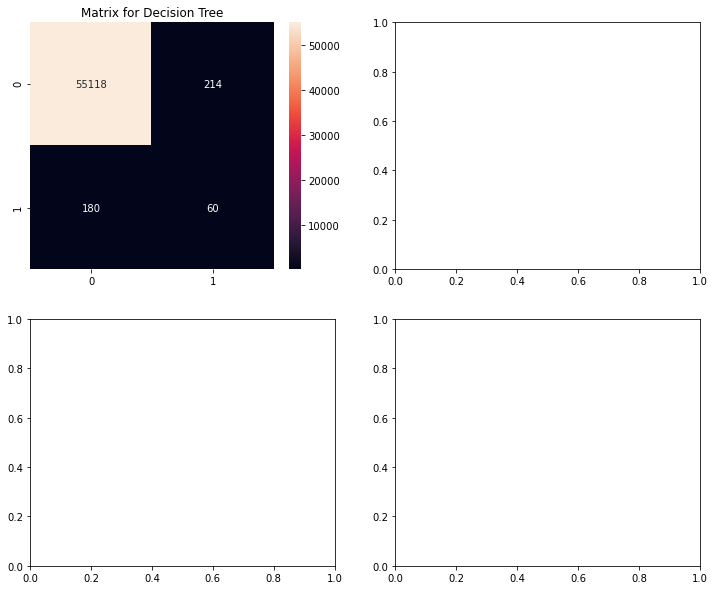

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict #prediction

f,ax=plt.subplots(2,2,figsize=(12,10))
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X_train_R,y_train_R,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X_train_R,y_train_R,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X_train,Y_train_R,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')


plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

### Model Evaluation

We will be using the ROC AUC curve to evaluate the models

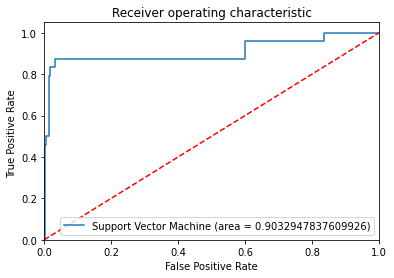

In [74]:
# ROC Curve For SVM
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import svm
SVM= svm.SVC(kernel='linear',C=0.1, gamma=0.1, probability=True)
SVM.fit(X_train_R, y_train_R)
SVM_roc_auc = roc_auc_score(y_test, SVM.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, SVM.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = {})'.format(SVM_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

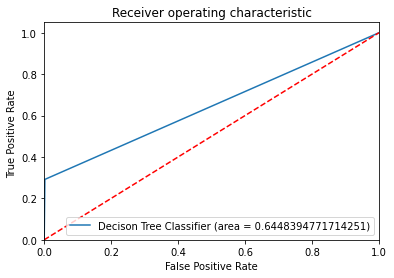

In [75]:
# ROC curve for Decision Trees
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
DTC_roc_auc = roc_auc_score(y_test, DTC.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, DTC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decison Tree Classifier (area = {})'.format(DTC_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

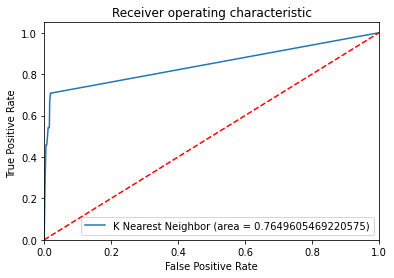

In [76]:
#ROC Curve for KNN
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KNN_roc_auc = roc_auc_score(y_test, KNN.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbor (area = {})'.format(KNN_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

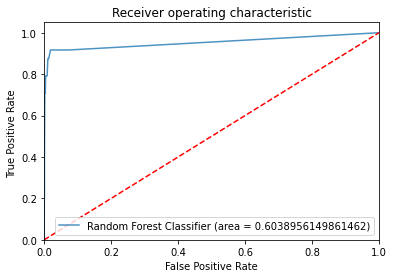

In [77]:
# ROC curve for Random Forest
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RFC_roc_auc = roc_auc_score(y_test, RFC.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, RFC.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, alpha=0.8, label='Random Forest Classifier (area = {})'.format(RFC_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




[Back to top](#Table-of-contents)

## Conclusion
The results of the model evaluation based on the accuracy answered the initial hypothesis which corresponded to the probability of fraud detection being very small compared to that of normal transactions.

The ROC_AUC metric used in evaluating all the models have shown that out of the 4 models, the Random Forest Classifier is the best performing model because it detected the highest percentage of fraud even though it had the least accuracy. The Support Vector Machines had the best accuracy but had the least percentage of fraud detection.

In conclusion, I recommend that the model be implemented and deployed so that it can be incorporated into fraud detection systems to detect credit card fraud in financial transactions of businesses and institutions.

[Back to top](#Table-of-contents)

## References

Pedregosa et al (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning, 2825-2830.

Brandon Harris, Kartik. S. (2020). Credit Card Fraud Detection Dataset. Retrieved from kaggle.com: https://www.kaggle.com/kartik2112/fraud-detection
 
Naik, Krish. C. (2019, June 25). gitbub.com/Krishnaik06. Retrieved from github.com: https://github.com/krishnaik06/Credit-Card-Fraudlent

Naik, Krish. C. (2019, June 27). github.com/krishnaik06. Retrieved from github.com: https://github.com/krishnaik06/Handle-Imbalanced-Dataset

Suresh K.S, Chetan J.A, Rashmi M., Sonam S.P (October 2019). A Review On Credit Card Fraud Detection Using Machine Learning. International Journal of Scientific & Technology Research, 1217-1220.

V.Dheepa, D. R. (2009). Analysis of Credit Card Fraud Detection Methods. International Journal of Recent Trends in Engineering, Vol 2, No. 3, 126-128.



[Back to top](#Table-of-contents)